In [1]:
import pandas as pd
import numpy as np
from math import log
from matplotlib import pyplot as plt

In [2]:
docs = [
  'I like a red apple',
  'the color of the banana is yellow',
  'long and yellow sweet banana',
  'I like fruits. especially apple and banana'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
# for doc in docs:
#     for w in doc.split():
#         vocab.append(w)

vocab.sort()

In [3]:
vocab

['I',
 'a',
 'and',
 'apple',
 'banana',
 'color',
 'especially',
 'fruits.',
 'is',
 'like',
 'long',
 'of',
 'red',
 'sweet',
 'the',
 'yellow']

In [4]:
N = len(docs)

def tf(t, d): # term freq - 한 문장 내 단어들의 빈도
    words_set = d.split(' ')
    return words_set.count(t)

def idf(t): # inverse doc freq - 단어가 들어간 문장의 개수
    df = 0 
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t, d) * idf(t)

- 단어 빈도 구하기

In [5]:
# Not Good : 동작이 직관적이지 못한 문제

result = []

for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

print(result)

tf_df = pd.DataFrame(result, columns = vocab)
tf_df

[[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]]


,I,a,and,apple,banana,color,especially,fruits.,is,like,long,of,red,sweet,the,yellow
0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,2,1
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1
3,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0


- 역문서 빈도 구하기

In [6]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    
idf_df = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_df

,IDF
I,0.287682
a,-0.223144
and,0.287682
apple,0.287682
banana,0.000000
color,0.693147
especially,0.693147
fruits.,0.693147
is,0.693147
like,0.287682


- TF-IDF 테이블 구하기

In [7]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_df = pd.DataFrame(result, columns = vocab)
tfidf_df

,I,a,and,apple,banana,color,especially,fruits.,is,like,long,of,red,sweet,the,yellow
0,0.287682,-0.223144,0.000000,0.287682,0.0,0.000000,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000
1,0.000000,-0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,1.386294,0.287682
2,0.000000,-0.000000,0.287682,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.287682
3,0.287682,-0.000000,0.287682,0.287682,0.0,0.000000,0.693147,0.693147,0.000000,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
  'I like a red apple',
  'the color of the banana is yellow',
  'long and yellow sweet banana',
  'I like fruit especially apples and bananas'
] 

vector = CountVectorizer()

print(vector.fit_transform(docs).toarray())
print(vector.vocabulary_)

[[0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 1 0 0 1 0 0 2 1]
 [1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1]
 [1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0]]
{'like': 9, 'red': 12, 'apple': 1, 'the': 14, 'color': 5, 'of': 11, 'banana': 3, 'is': 8, 'yellow': 15, 'long': 10, 'and': 0, 'sweet': 13, 'fruit': 7, 'especially': 6, 'apples': 2, 'bananas': 4}


In [9]:
tfidfv = TfidfVectorizer().fit(docs)
print(tfidfv.transform(docs).toarray())
rfidf_arr = tfidfv.transform(docs).toarray()
rfidf_arr

[[0.         0.61761437 0.         0.         0.         0.
  0.         0.         0.         0.48693426 0.         0.
  0.61761437 0.         0.         0.        ]
 [0.         0.         0.         0.27460308 0.         0.34829919
  0.         0.         0.34829919 0.         0.         0.34829919
  0.         0.         0.69659839 0.27460308]
 [0.40104275 0.         0.         0.40104275 0.         0.
  0.         0.         0.         0.         0.50867187 0.
  0.         0.50867187 0.         0.40104275]
 [0.34431452 0.         0.43671931 0.         0.43671931 0.
  0.43671931 0.43671931 0.         0.34431452 0.         0.
  0.         0.         0.         0.        ]]


array([[0.        , 0.61761437, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.48693426,
        0.        , 0.        , 0.61761437, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.27460308, 0.        ,
        0.34829919, 0.        , 0.        , 0.34829919, 0.        ,
        0.        , 0.34829919, 0.        , 0.        , 0.69659839,
        0.27460308],
       [0.40104275, 0.        , 0.        , 0.40104275, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.50867187, 0.        , 0.        , 0.50867187, 0.        ,
        0.40104275],
       [0.34431452, 0.        , 0.43671931, 0.        , 0.43671931,
        0.        , 0.43671931, 0.43671931, 0.        , 0.34431452,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

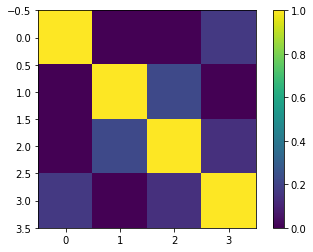

array([[1.        , 0.        , 0.        , 0.16765854],
       [0.        , 1.        , 0.22025515, 0.        ],
       [0.        , 0.22025515, 1.        , 0.13808484],
       [0.16765854, 0.        , 0.13808484, 1.        ]])

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

cos_matrix = cosine_similarity(rfidf_arr, rfidf_arr)
plt.imshow(cos_matrix)
plt.colorbar()
plt.show()
cos_matrix

- 제일 유사한 문장 뽑기

In [11]:
# 1번 문서와 제일 유사한 문서
my_doc_idx = 1 
np.argsort(cos_matrix[my_doc_idx], axis = 0)[::-1][1]

2

### Movie Data

In [12]:
# %cd /content/drive/MyDrive/Colab Notebooks/05_추천시스템

# !unzip -qq "/content/drive/MyDrive/Colab Notebooks/05_추천시스템/kaggle_movie.zip"

In [13]:
movies_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/05_추천시스템/movies_metadata.csv', low_memory=False)[['id', 'title', 'overview']]
movies_df

,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,439050,Subdue,Rising and falling between a man and woman.
45462,111109,Century of Birthing,An artist struggles to finish his work while a...
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,227506,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [14]:
movies_df.isna().sum()

id            0
title         6
overview    954
dtype: int64

In [15]:
movies_df = movies_df.dropna()
movies_df = movies_df.drop_duplicates()
print(movies_df.nunique())
movies_df

id          44476
title       41371
overview    44303
dtype: int64


,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,439050,Subdue,Rising and falling between a man and woman.
45462,111109,Century of Birthing,An artist struggles to finish his work while a...
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,227506,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [16]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])
tfidf_matrix

<44476x75827 sparse matrix of type '<class 'numpy.float64'>'
	with 1209924 stored elements in Compressed Sparse Row format>

- 44476 : 문장의 개수    
- 75827 : 단어의 개수 or vocab의 크기    
- sparse matrix of type : container의 타입    
 
- 1209924 stored elements - elements의 수

In [17]:
100*1209924/(44476*75827) # data density = 0.03% / 데이터가 3000배 증가했다는 말

0.03587637012887743

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim_df = pd.DataFrame(cosine_sim, index = movies_df.id , columns=movies_df.id)
cos_sim_df

In [20]:
movie_name = 'Toy Story'
movie_id = movies_df[movies_df['title'] == movie_name].id

In [ ]:
cos_sim_df.loc[movie_id]